In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dp


In [ ]:
uberReq = pd.read_csv('Uber Request Data.csv',encoding = "ISO-8859-1")
uberReq.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
uberReq.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [ ]:
uberReq.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [ ]:
#Correcting the data types
uberReq['Request timestamp'] = pd.to_datetime(uberReq['Request timestamp'])
uberReq['Drop timestamp'] = pd.to_datetime(uberReq['Drop timestamp'])
uberReq.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
uberReq.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [ ]:
# Removing unnecessary columns
uberReq = uberReq.drop(['Driver id'], axis = 1)

In [ ]:
uberReq.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
uberReq.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT


In [ ]:

#How many unique pickup points are present in uberReq?
print(uberReq['Pickup point'].unique())



['Airport' 'City']


In [ ]:

(6745, 5)


(6745, 5)

In [ ]:
#Inspecting the Null values , column-wise
uberReq.isnull().sum(axis=0)


Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
uberReq[(uberReq['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [ ]:
print(len(uberReq['Request id'].unique()))
print(len(uberReq['Pickup point'].unique()))
print(len(uberReq['Status'].unique()))

6745
2
3


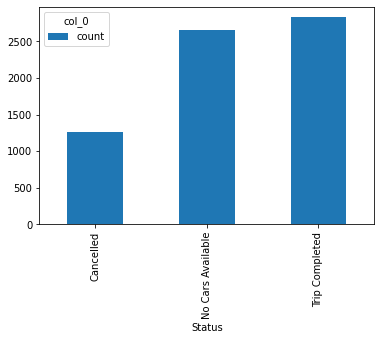

In [ ]:
status = pd.crosstab(index = uberReq["Status"], columns="count")     
status.plot.bar()

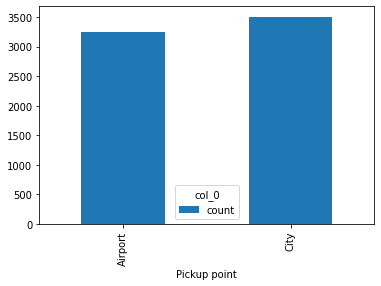

In [ ]:
#Univariate analysis on Pickup Point column 
pick_point = pd.crosstab(index = uberReq["Pickup point"], columns="count")     
pick_point.plot.bar()

In [ ]:

#grouping by Status and Pickup point.
uberReq.groupby(['Status', 'Pickup point']).size()


Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

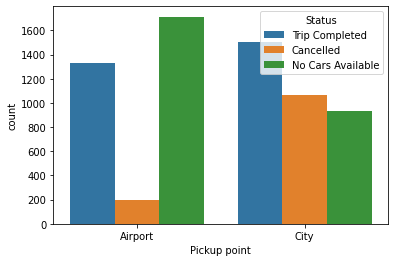

In [ ]:
# Visualizing the count of Status and Pickup point bivariate analysis
sns.countplot(x=uberReq['Pickup point'],hue =uberReq['Status'] ,data = uberReq)


In [ ]:
#Request and Drop hours
uberReq['Request Hour'] = uberReq['Request timestamp'].dt.hour


In [ ]:
#Time Slots
uberReq['Request Time Slot'] = 'Early Morning'
uberReq.loc[uberReq['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
uberReq.loc[uberReq['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
uberReq.loc[uberReq['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
uberReq.loc[uberReq['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uberReq.loc[uberReq['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [ ]:
#As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
uberReq['Demand'] = 1


In [ ]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
uberReq['Supply'] = 0
uberReq.loc[(uberReq['Status'] == 'Trip Completed'),'Supply'] = 1

#Demand Supply Gap can be defined as a difference between Demand and Supply
uberReq['Gap'] = uberReq['Demand'] - uberReq['Supply']
uberReq.loc[uberReq['Gap']==0,'Gap'] = 'Trip Completed'
uberReq.loc[uberReq['Gap']==1,'Gap'] = 'Trip Not Completed'

In [ ]:
#Removing unnecessary columns
uberReq = uberReq.drop(['Request Hour', 'Demand', 'Supply'], axis=1)

uberReq.head()



,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


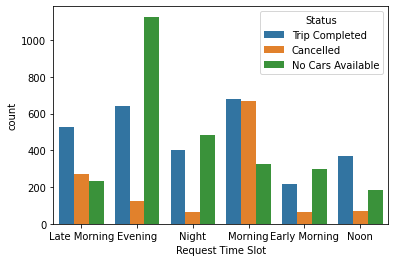

In [ ]:
# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=uberReq['Request Time Slot'],hue =uberReq['Status'] ,data = uberReq)


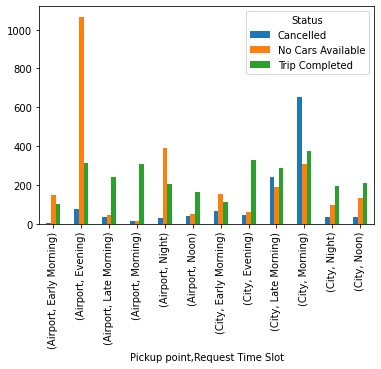

In [ ]:
# Plot to find the count of the status, according to both pickup point and the time slot
pickup_df = pd.DataFrame(uberReq.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()


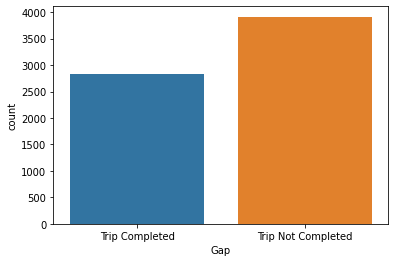

In [ ]:
#Plot to count the number of requests that was completed and which was not
sns.countplot(x=uberReq['Gap'], data = uberReq)

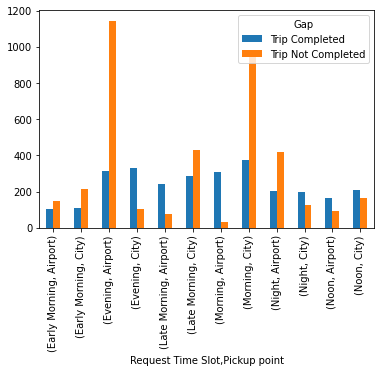

In [ ]:
#Plot to count the number of requests that was completed and which was not, for the final analysis
gap_main_df = pd.DataFrame(uberReq.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

